Import Libraries

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

Load Dataset

In [11]:
# Import txt file
df2 = pd.read_csv('A1-synthetic.txt', sep="\t", decimal=".")

# Rename the column '#v1' to 'v1'
df2.rename(columns={'#v1': 'v1'}, inplace=True)

# Separate features (x2) and target variable (y2)
x, y = df2.drop(["z"], axis=1), df2[["z"]]

min = np.min(y["z"])
max = np.max(y["z"])

# Scale the features and target variable to the range [0, 1]
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)
y = y * 0.8 + 0.1  # Transform y2 to the desired range [0.1, 0.9]

Train-Test Split

In [12]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Create and Train MLR Model

In [13]:
mlr_model = LinearRegression()
mlr_model.fit(x_train, y_train)

LinearRegression()

Make Predictions

In [14]:
mlr_predictions = mlr_model.predict(x_test)

# Denormalize the predictions and target variable
mlr_predictions = mlr_predictions * 0.8 + 0.1
mlr_predictions = mlr_predictions * (max - min) + min

y_test = y_test * 0.8 + 0.1
y_test = y_test * (max - min) + min	

Evaluate Model Performance

In [15]:
mape_mlr = mean_absolute_percentage_error(y_test, mlr_predictions)
print(f"MAPE for MLR: {mape_mlr}")


mae_mlr = mean_absolute_error(y_test, mlr_predictions)
print(f"MAE for MLR: {mae_mlr}")


MAPE for MLR: 0.05389579988497479
MAE for MLR: 0.3359415149215934


Scatter Plot

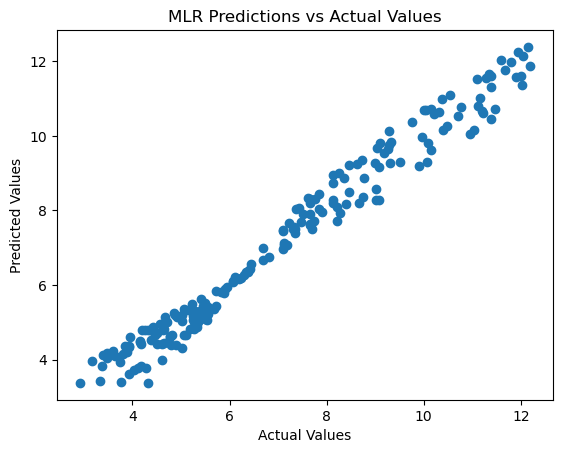

In [16]:
plt.scatter(y_test, mlr_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("MLR Predictions vs Actual Values")
plt.show()
